###  Caso de Obesidad
##### Universidad Externado
##### Seminario de Programación
##### Anjely Amazo, Liliana Hernandez y Julieth Perea


#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)



### ¿Como afectan la condición física y los hábitos alimenticios a la obesidad?

Iniciamos con un analisis exploratorio de la base, cargando la base y las librerias: 

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import future

In [10]:
#Regresiòn, red neuronal y arbol de decisiòn
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn import linear_model
from sklearn import model_selection

import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier




In [11]:
#DataO=pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')
DataO=pd.read_csv('C:/Users/perea/OneDrive/Escritorio/Taller obesidad/ObesityDataSet_raw_and_data_sinthetic.csv')

Evidenciamos las variables que trae la base las cuales son 17, y vienen de tipo númerico y caracteres:

In [12]:
DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [13]:
DataO

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.00,3.00,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.98,1.75,133.74,yes,yes,3.00,3.00,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.52,1.75,133.69,yes,yes,3.00,3.00,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.36,1.74,133.35,yes,yes,3.00,3.00,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


En primer lugar, ajustaremos los nombres de las variables de la base de datos de acuerdo a su información:

In [14]:
DataO.set_axis(['Genero', 'Edad', 'Estatura','Peso','Familiar_tiene_sobrepeso','Consumo_frecuente_alimentos_altos_calorias','Frecuencia_consumo_verduras','Numero_comidas_principales','Consumo_alimentos_entre_comidas','Fuma','Consumo_agua_diaria','Monitoreo_calorias_diaria','Frecuencia_actividad_fisica','Tiempo_utilizando_tecnologia','Consumo_alcohol','Transporte_utilizado','Nivel_obesidad'], 
                 axis='columns', inplace=True)
DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Genero                                      2111 non-null   object 
 1   Edad                                        2111 non-null   float64
 2   Estatura                                    2111 non-null   float64
 3   Peso                                        2111 non-null   float64
 4   Familiar_tiene_sobrepeso                    2111 non-null   object 
 5   Consumo_frecuente_alimentos_altos_calorias  2111 non-null   object 
 6   Frecuencia_consumo_verduras                 2111 non-null   float64
 7   Numero_comidas_principales                  2111 non-null   float64
 8   Consumo_alimentos_entre_comidas             2111 non-null   object 
 9   Fuma                                        2111 non-null   object 
 10  Consumo_agua

De acuerdo a la información encontrada en el link de descarga, sabemos que tenemos los siguientes datos: 
Consumo frecuente de alimentos altos en calorías (FAVC), Frecuencia de consumo de verduras (FCVC), Número de comidas principales (NCP), Consumo de alimentos entre comidas (CAEC), Consumo de agua diaria (CH20) y Consumo de alcohol (CALC). Los atributos relacionados con la condición física son: Monitoreo del consumo de calorías (SCC), Frecuencia de actividad física (FAF), Tiempo utilizando dispositivos tecnológicos (TUE), Transporte utilizado (MTRANS), otras variables obtenidas fueron: Género, Edad, Altura y Peso. Finalmente, se etiquetaron todos los datos y se creó la variable de clase NObesidad con los valores de: Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III, con base en la Ecuación (1) e información de la OMS y la Normatividad Mexicana. 

In [15]:
#tipo de registro
display("Tipos de registros en el DataFrame",DataO.dtypes)

'Tipos de registros en el DataFrame'

Genero                                         object
Edad                                          float64
Estatura                                      float64
Peso                                          float64
Familiar_tiene_sobrepeso                       object
Consumo_frecuente_alimentos_altos_calorias     object
Frecuencia_consumo_verduras                   float64
Numero_comidas_principales                    float64
Consumo_alimentos_entre_comidas                object
Fuma                                           object
Consumo_agua_diaria                           float64
Monitoreo_calorias_diaria                      object
Frecuencia_actividad_fisica                   float64
Tiempo_utilizando_tecnologia                  float64
Consumo_alcohol                                object
Transporte_utilizado                           object
Nivel_obesidad                                 object
dtype: object

En segundo lugar, realizaremos la manipulacion y tratamiento de las variables de la base de datos, de la siguiente manera:

In [16]:
DataO["Edad"]=round(DataO["Edad"])
DataO["Edad"]=round(DataO["Edad"]).astype(int)

DataO["Frecuencia_consumo_verduras"]=round(DataO["Frecuencia_consumo_verduras"])
DataO["Frecuencia_consumo_verduras"]=round(DataO["Frecuencia_consumo_verduras"]).astype(int)
DataO["Frecuencia_consumo_verduras"]=round(DataO["Frecuencia_consumo_verduras"]).astype(object)

DataO["Numero_comidas_principales"]=round(DataO["Numero_comidas_principales"])
DataO["Numero_comidas_principales"]=round(DataO["Numero_comidas_principales"]).astype(int)
DataO["Numero_comidas_principales"]=round(DataO["Numero_comidas_principales"]).astype(object)

DataO["Consumo_agua_diaria"]=round(DataO["Consumo_agua_diaria"])
DataO["Consumo_agua_diaria"]=round(DataO["Consumo_agua_diaria"]).astype(int)
DataO["Consumo_agua_diaria"]=round(DataO["Consumo_agua_diaria"]).astype(object)

DataO["Frecuencia_actividad_fisica"]=round(DataO["Frecuencia_actividad_fisica"])
DataO["Frecuencia_actividad_fisica"]=round(DataO["Frecuencia_actividad_fisica"]).astype(int)
DataO["Frecuencia_actividad_fisica"]=round(DataO["Frecuencia_actividad_fisica"]).astype(object)

DataO["Tiempo_utilizando_tecnologia"]=round(DataO["Tiempo_utilizando_tecnologia"])
DataO["Tiempo_utilizando_tecnologia"]=round(DataO["Tiempo_utilizando_tecnologia"]).astype(int)
DataO["Tiempo_utilizando_tecnologia"]=round(DataO["Tiempo_utilizando_tecnologia"]).astype(object)

In [17]:
Base_ajustada_Data = DataO.copy()

In [18]:
DataO["Frecuencia_consumo_verduras"]=pd.Categorical(DataO["Frecuencia_consumo_verduras"])
DataO["Numero_comidas_principales"]=pd.Categorical(DataO["Numero_comidas_principales"])
DataO["Consumo_agua_diaria"]=pd.Categorical(DataO["Consumo_agua_diaria"])
DataO["Tiempo_utilizando_tecnologia"]=pd.Categorical(DataO["Tiempo_utilizando_tecnologia"])

In [19]:
DataO.Genero = DataO.Genero.replace({"Female": 1, "Male": 0})
DataO.Familiar_tiene_sobrepeso = DataO.Familiar_tiene_sobrepeso.replace({"yes": 1, "no": 0})
DataO.Consumo_frecuente_alimentos_altos_calorias = DataO.Consumo_frecuente_alimentos_altos_calorias.replace({"yes": 1, "no": 0})
DataO.Fuma = DataO.Fuma.replace({"yes": 1, "no": 0})
DataO.Monitoreo_calorias_diaria = DataO.Monitoreo_calorias_diaria.replace({"yes": 1, "no": 0})
DataO.Transporte_utilizado = DataO.Transporte_utilizado.replace({"Automobile": 1, "Bike": 2,"Motorbike" :3 , "Public_Transportation" :4,"Walking" :5},)
#DataO.Nivel_obesidad = DataO.Nivel_obesidad.replace({"Obesity_Type_I": 1, "Obesity_Type_II": 2,"Obesity_Type_III" :3 , "Overweight_Level_I" :4,"Overweight_Level_II" :5,"Normal_Weight" :6, "Insufficient_Weight" :7},)

Ahora bien, vamos a ingresar las variables que definimos para nuestro analisis y se creara la variable indice de masa muscular:

In [20]:
DataO["Masa_Muscular"]= (DataO["Peso"])/((DataO["Estatura"])*(DataO["Estatura"]))

In [21]:
Base_DF = ['Genero','Edad','Estatura','Peso','Familiar_tiene_sobrepeso','Consumo_frecuente_alimentos_altos_calorias','Fuma','Monitoreo_calorias_diaria','Masa_Muscular']

In [22]:
Base_catego = pd.get_dummies(DataO[Base_DF])
Base_Data = pd.concat([Base_catego,DataO['Nivel_obesidad']], axis=1)
Base_Data

,Genero,Edad,Estatura,Peso,Familiar_tiene_sobrepeso,Consumo_frecuente_alimentos_altos_calorias,Fuma,Monitoreo_calorias_diaria,Masa_Muscular,Nivel_obesidad
0,1,21,1.62,64.00,1,0,0,0,24.39,Normal_Weight
1,1,21,1.52,56.00,1,0,1,1,24.24,Normal_Weight
2,0,23,1.80,77.00,1,0,0,0,23.77,Normal_Weight
3,0,27,1.80,87.00,0,0,0,0,26.85,Overweight_Level_I
4,0,22,1.78,89.80,0,0,0,0,28.34,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,1,21,1.71,131.41,1,1,0,0,44.90,Obesity_Type_III
2107,1,22,1.75,133.74,1,1,0,0,43.74,Obesity_Type_III
2108,1,23,1.75,133.69,1,1,0,0,43.54,Obesity_Type_III
2109,1,24,1.74,133.35,1,1,0,0,44.07,Obesity_Type_III


En este punto, de la base que definimos anteriormente vamos a realizar un analisis descriptivos de los datos

### Descripción Datos

La información anterior, refleja que el registro corresponde a 1.068 al género masculino es decir el 50,59% y 1.043 al femenino con el 49.41%, como se ilustra a continuación:

In [23]:
genero_desc= pd.DataFrame(Base_Data['Genero'].value_counts(sort=True))
genero_desc

,Genero
0,1068
1,1043


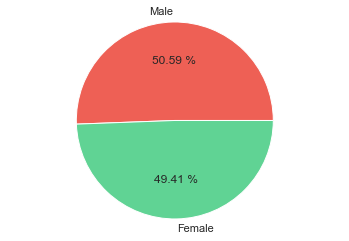

In [24]:
valores = [1068, 1043]
nombres_orden = ["Male","Female"]
colores = ["#EE6055","#60D394"]
desfase = (0, 0)
plt.pie(valores, labels=nombres_orden, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

Ahora bien, al analizar el nivel de obesidad se identificó que el tipo de obesidad se concentra en estos 3 niveles: la obesidad tipo I cuenta con 351 registros, seguido de la obesidad tipo III con 324 registros y la obesidad tipo II con el 297 de los casos.

In [25]:
nivel_obesidad_desc= pd.DataFrame(Base_Data['Nivel_obesidad'].value_counts(sort=True))
nivel_obesidad_desc

,Nivel_obesidad
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


AxesSubplot(0.125,0.125;0.775x0.755)


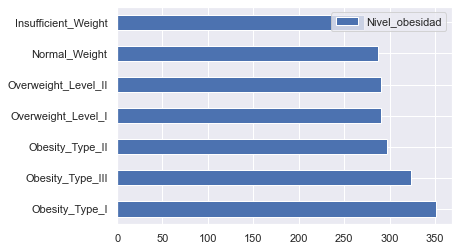

In [26]:
axis = nivel_obesidad_desc.plot.barh(rot=0)
print(axis)
plt.show()

En este punto, analizamos la obesidad desde la variable consumo de alcohol y se identificó que los casos registrados 1.401 indicó que consumo a veces licor (Somethimes), es decir el 66%, en 639 casos no consumo licor (no) con un 30%, en 70 casos consumen frecuentemente (Frequently) con el 3% y 1 un caso indico que siempre, como se ilustra a continuación:

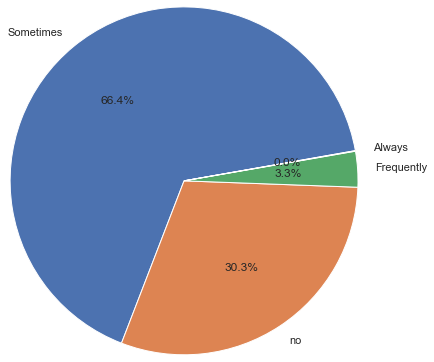

In [27]:
etiquetas = ["Sometimes","no","Frequently", "Always"] 
porcentas = [1401,639,70,1]
plt.pie(porcentas,labels = etiquetas, radius = 2,
        startangle=10, autopct = '%1.1f%%')
plt.show()  

### Exploración de datos

Ahora revisemos la correlación de los datos:

In [28]:
#Otra manera
#Base_Data.corr(method='pearson',min_periods=1)

In [29]:
corr = Base_Data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Genero,Edad,Estatura,Peso,Familiar_tiene_sobrepeso,Consumo_frecuente_alimentos_altos_calorias,Fuma,Monitoreo_calorias_diaria,Masa_Muscular
Genero,1.000000,-0.048682,-0.618466,-0.161668,-0.102512,-0.064934,-0.044698,0.102633,0.053035
Edad,-0.048682,1.000000,-0.026184,0.203452,0.205494,0.063392,0.091354,-0.116028,0.245281
Estatura,-0.618466,-0.026184,1.000000,0.463136,0.247684,0.178364,0.055499,-0.133753,0.131785
Peso,-0.161668,0.203452,0.463136,1.000000,0.496820,0.272300,0.025746,-0.201906,0.934806
Familiar_tiene_sobrepeso,-0.102512,0.205494,0.247684,0.496820,1.000000,0.208036,0.017385,-0.185422,0.483508
Consumo_frecuente_alimentos_altos_calorias,-0.064934,0.063392,0.178364,0.272300,0.208036,1.000000,-0.050660,-0.190658,0.246097
Fuma,-0.044698,0.091354,0.055499,0.025746,0.017385,-0.050660,1.000000,0.047731,-0.000819
Monitoreo_calorias_diaria,0.102633,-0.116028,-0.133753,-0.201906,-0.185422,-0.190658,0.047731,1.000000,-0.184286
Masa_Muscular,0.053035,0.245281,0.131785,0.934806,0.483508,0.246097,-0.000819,-0.184286,1.000000


Se analizó la correlación graficamente entre las siguientes variables:

###### - Variables Peso, Masa Muscular y Genero

<AxesSubplot:xlabel='Peso', ylabel='Masa_Muscular'>

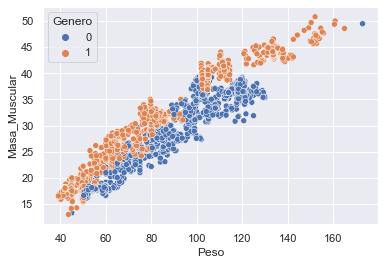

In [31]:
sns.scatterplot(data=Base_Data,
                x='Peso',
                y='Masa_Muscular',
                hue='Genero')

###### - Variables Peso, Estatura y Nivel de obesidad

<AxesSubplot:xlabel='Peso', ylabel='Estatura'>

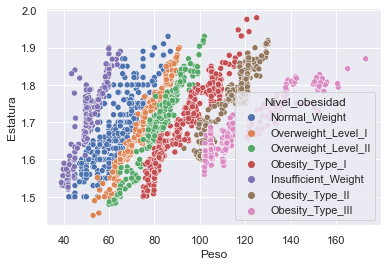

In [32]:
sns.scatterplot(data=Base_Data,
                x='Peso',
                y='Estatura',
                hue='Nivel_obesidad')

De la gráfica anterior, se evidencia una relación entre la altura y el peso en el nivel de obesidad, sobre todo se logró evidenciar por genero quien tiene un mayor nivel de obesidad.

En este punto, realizaremos un pairplot que grafica las relaciones por pares en un dataframe completo (para las columnas numéricas):

In [33]:
 np.random.seed(2021)

In [34]:
Grupo_Pairplot= Base_Data.loc[:,['Edad','Estatura','Peso','Masa_Muscular']]
Grupo_Pairplot

,Edad,Estatura,Peso,Masa_Muscular
0,21,1.62,64.00,24.39
1,21,1.52,56.00,24.24
2,23,1.80,77.00,23.77
3,27,1.80,87.00,26.85
4,22,1.78,89.80,28.34
...,...,...,...,...
2106,21,1.71,131.41,44.90
2107,22,1.75,133.74,43.74
2108,23,1.75,133.69,43.54
2109,24,1.74,133.35,44.07


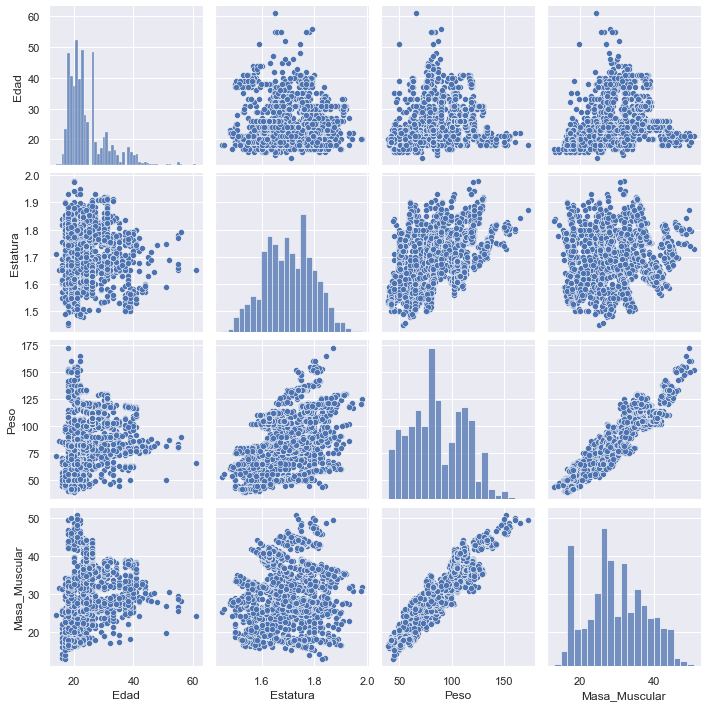

In [35]:
# Ejemplo pairplot con datase iris
g = sns.pairplot(Grupo_Pairplot)

### Clasifiación Red Neuronal 

In [44]:
#Variables
X = Base_Data.drop('Nivel_obesidad', axis=1).values
y = np.asarray(pd.get_dummies(Base_Data['Nivel_obesidad']).values).astype('float32')
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

(2111, 9) (2111, 7)


array([[ 0.        , 27.        ,  1.812259  , ...,  0.        ,
         0.        , 36.01323894],
       [ 1.        , 22.        ,  1.67      , ...,  0.        ,
         1.        , 17.92821543],
       [ 0.        , 18.        ,  1.793926  , ...,  0.        ,
         0.        , 18.54550314],
       ...,
       [ 0.        , 26.        ,  1.773664  , ...,  0.        ,
         0.        , 36.92454317],
       [ 0.        , 30.        ,  1.701566  , ...,  0.        ,
         0.        , 35.83137217],
       [ 1.        , 43.        ,  1.582523  , ...,  0.        ,
         0.        , 32.71048532]])

In [45]:
mul_clas = Sequential()
mul_clas.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
mul_clas.add(Dense(32, activation='relu'))
mul_clas.add(Dense(16, activation='relu'))
mul_clas.add(Dense(7, activation='softmax'))
mul_clas.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = mul_clas.fit(X_train, y_train, epochs=1000, verbose=0)


In [47]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

<Figure size 576x432 with 0 Axes>

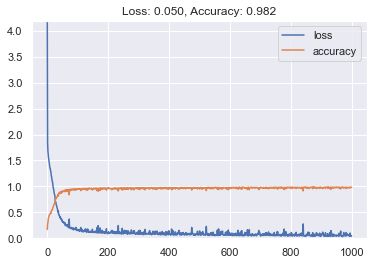

In [48]:
plot_loss_accuracy(history)

In [53]:
y_pred_class = np.argmax(mul_clas.predict(X_test, verbose=0),axis=1)
y_test_class = np.argmax(y_test, axis=1)

def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.94      0.91      0.93        56
           2       0.94      0.95      0.95        65
           3       1.00      0.92      0.96        51
           4       1.00      1.00      1.00        73
           5       0.88      0.90      0.89        62
           6       0.88      0.88      0.88        57

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



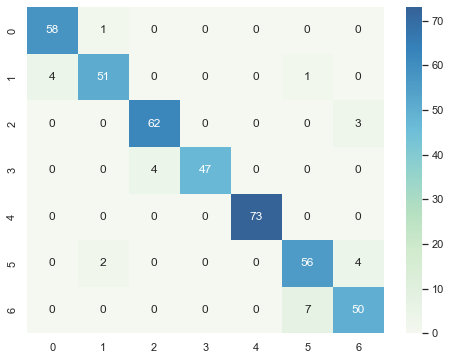

In [51]:
plot_confusion_matrix(mul_clas, X_test, y_test_class)

### Regresiòn

Ahora bien, presentamos la regresiòn

In [64]:
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df



In [65]:
y=Base_Data[['Nivel_obesidad']]
y1=Encoder(y)

In [66]:
X_entreno,X_testeo,Y_entreno,Y_testeo= model_selection.train_test_split(X,y1,test_size=0.3,random_state=29)

In [67]:
X_entreno.shape

(1477, 9)

In [68]:
X_testeo.shape

(634, 9)

In [69]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_entreno,Y_entreno)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [70]:
lm.score(X_testeo, Y_testeo)

0.6845425867507886

              precision    recall  f1-score   support

           0       1.00      0.12      0.22       634
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.12       634
   macro avg       0.14      0.02      0.03       634
weighted avg       1.00      0.12      0.22       634



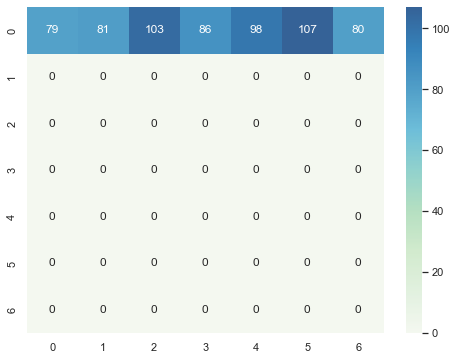

In [71]:
y_pred_class = np.argmax(mul_clas.predict(X_testeo, verbose=0),axis=1)
y_test_class = np.argmax(Y_testeo, axis=1)
def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))
plot_confusion_matrix(mul_clas, X_testeo, y_test_class)

### Arbol de decisiòn

Por otra parte, realizaremos el arbol de decisiones que es técnica de machine learning, la cual toma una serie de decisiones en forma de árbol. Los nodos intermedios (las ramas) representan soluciones, como se ilustra a continuaciòn:

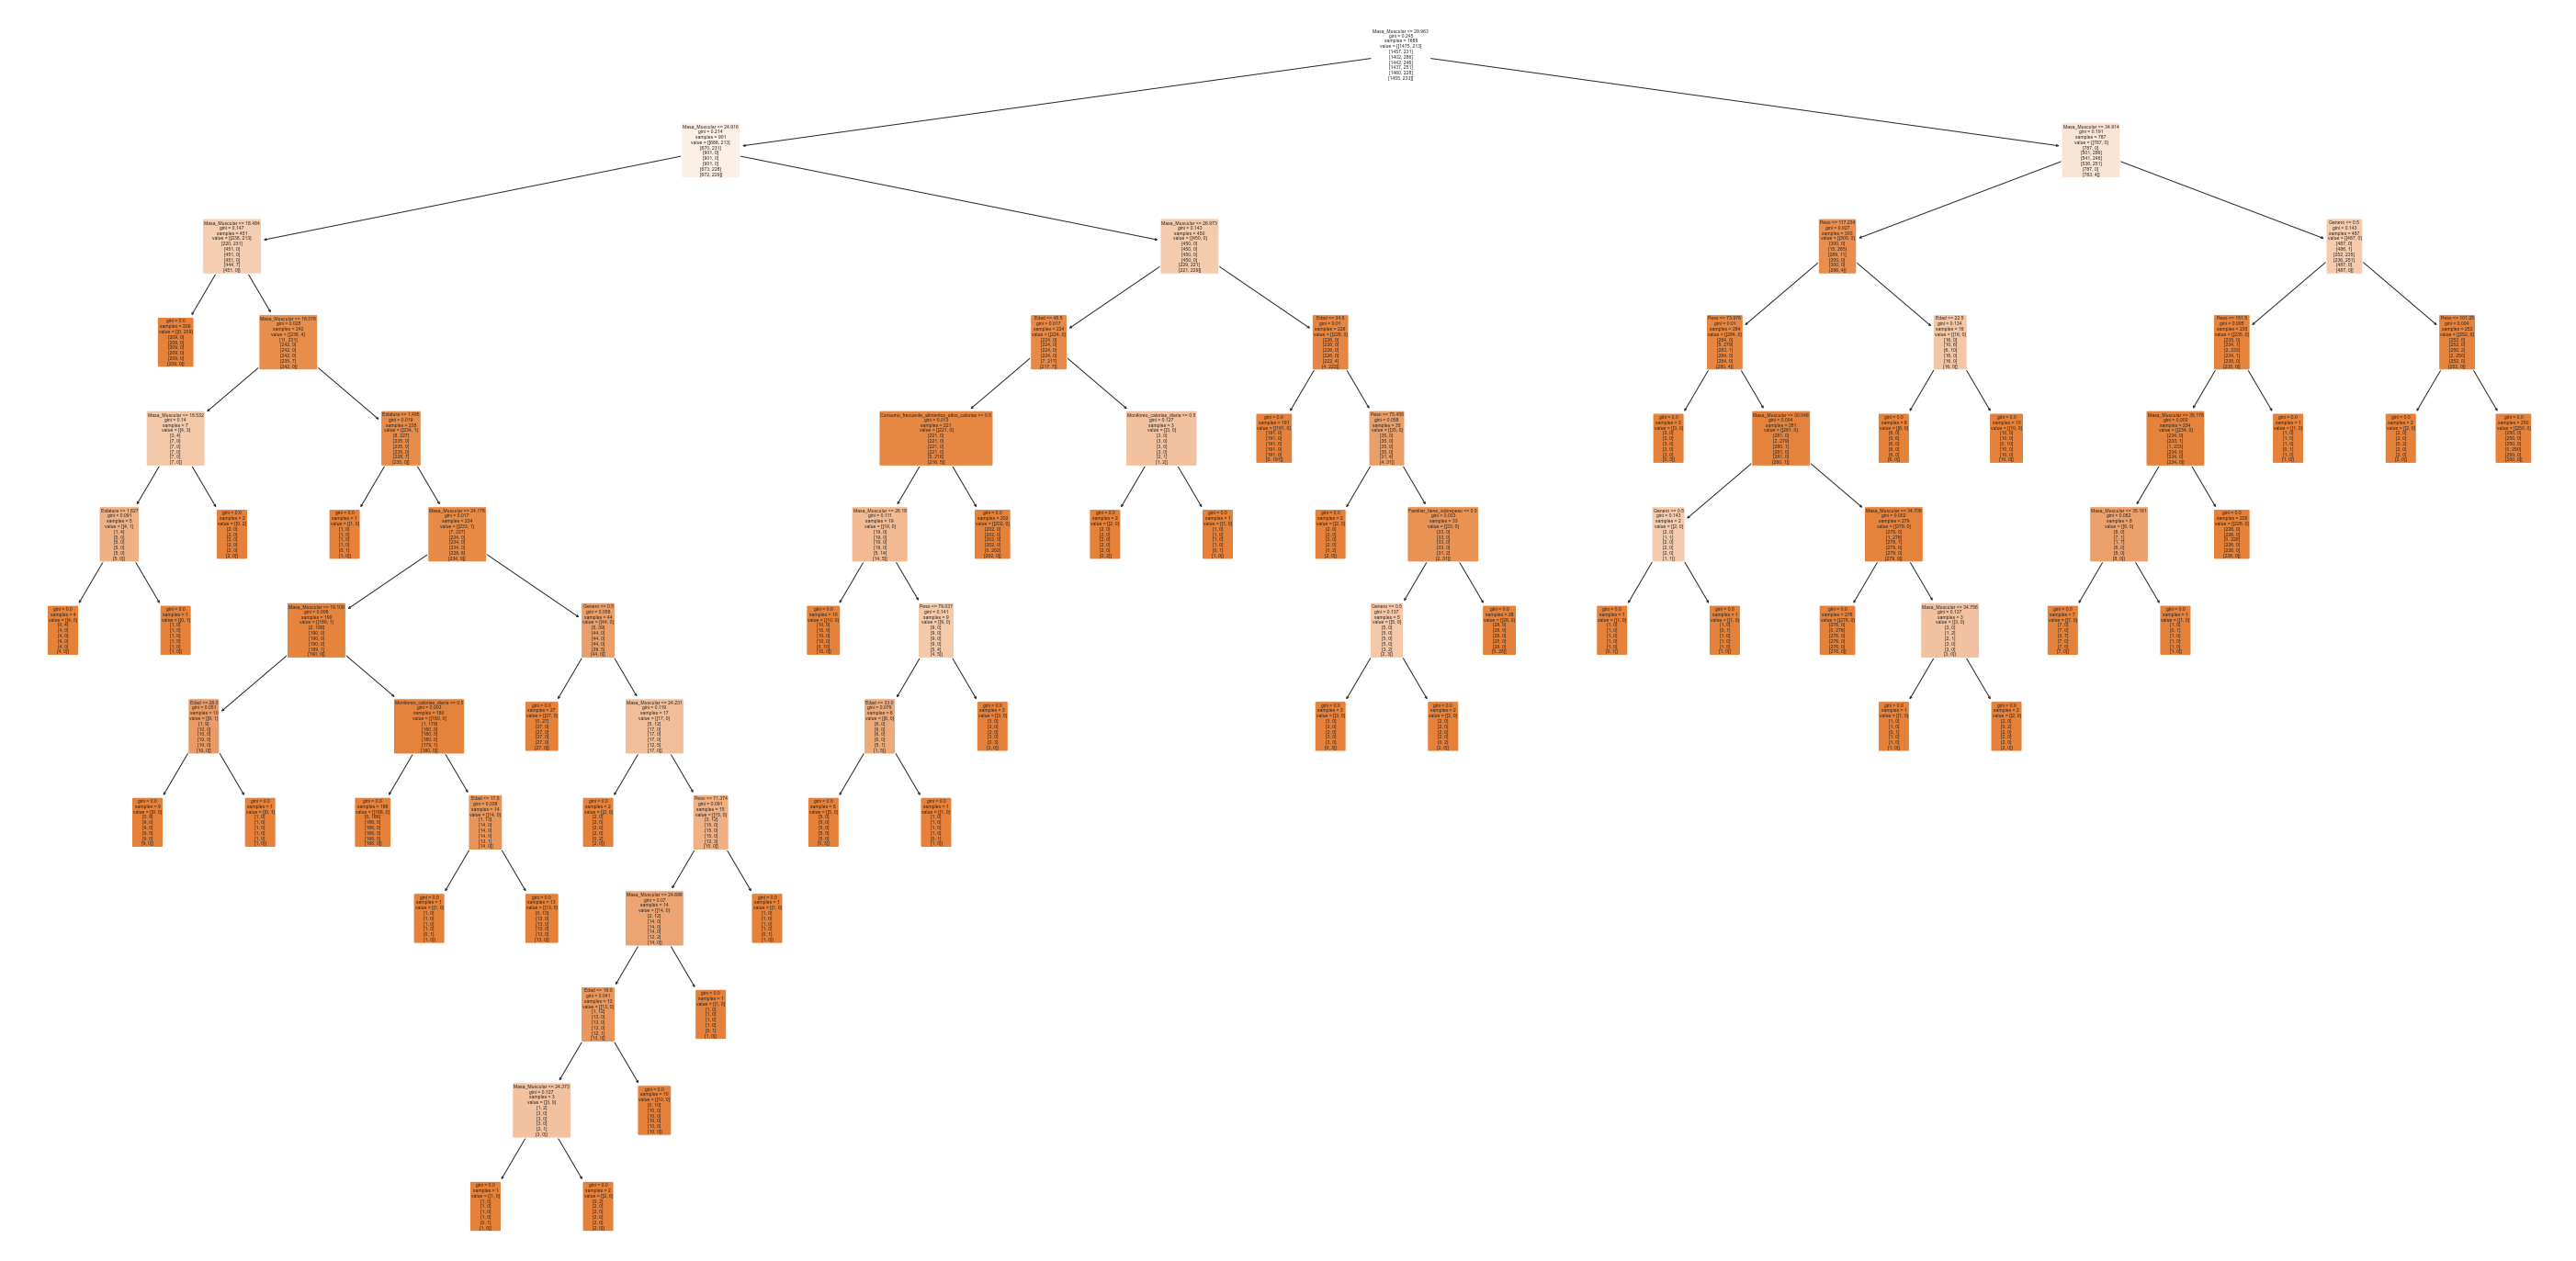

In [54]:
a = DecisionTreeClassifier()
x = a.fit(X_train,y_train)

#árbol de decisiones
plt.figure(figsize=(50,25))
plot_tree(x, filled=True, rounded=True, class_names=['Peso Normal', 'Exceso de peso Tipo_I', 'Exceso de peso Tipo_II','Obesidad Tipo_I', 'Peso insuficiente', 'Obesidad tipo_II','Obesidad tipo_III'],
         feature_names=Base_Data.columns);

Del informe se puede determinar que la condición física y los hábitos alimenticios, afectan directamente a la obesidad, es decir, la correlación positiva que se evidenció entre las variables estatura y peso, peso y familiar con sobre pesos, índice de masa muscular y sobre peso, entre otras variables que fueron positivas, pero o representaron una alta correlación.

Por otra parte, la información refleja que el registro corresponde a 1.068 al género masculino es decir el 50,59% y 1.043 al femenino con el 49.41%, es decir, la población masculina es más obesa y así se refleja en la gráfica anterior. 

por último, se calculó para el nivel de obesidad, que como se manifestó al comienzo es una variable muy significativa para el modelo nos arrojó una regresión optima.
